In [1]:
import warnings
warnings.filterwarnings("ignore")

In this Notebook we will go over what Logistic Regression is, and how to implement it in Python with [RAPIDS](https://medium.com/future-vision/what-is-rapids-ai-7e552d80a1d2?source=friends_link&sk=64b79c363beeffb9923e16482f3977cc) cuML.

This Notebook can be run with a free GPU at [app.blazingsql.com](http://bit.ly/intro_ds_notebooks): `git clone https://github.com/gumdropsteve/cuml_logistic_regression`

# [Beginner's Guide to Logistic Regression with cuML](https://github.com/gumdropsteve/cuml_logistic_regression)

Logistic regression is a model used for predicting the probability of events, given some other measurements. Logistic Regression is used when the dependent variable ("target") is categorical.

For example,
- Will the team win (1) or lose (0) this game?
- Are users going to stop using our app (1) or not (0)?

Logistic regression can also be used in nonbinary situations, but let's cover that in a later post and stick to binary logistic regression for now.

![Logistic Regression gif (University of Toronto)](https://cdn-images-1.medium.com/max/800/0*JgBI4I1QeTYQRj8j.gif)

## How does Logistic Regression Work?
Logistic regression transforms its output using the logistic sigmoid function to return a probability value. A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.

In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio. 

![Dog riding Horse](https://thumbs.gfycat.com/OrneryImpossibleKittiwake-small.gif)

In [1]:
import cudf

df = cudf.read_csv('dog_or_horse.csv')

## EDA - What's the data look like?
Before jumping in, let's explore our dataset. By converting cuDF `.to_pandas()`, we can utilize Matplotlib to visualize the overlaps in height and weight.

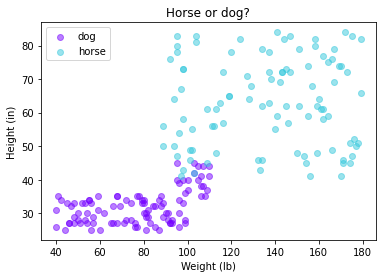

In [5]:
import matplotlib.pyplot as plt

# scatter dogs
plt.scatter(df.loc[ df['target']==0 ]['weight'].to_pandas(), 
            y=df[ df['target']==0 ]['height'].to_pandas(), 
            label='dog', 
            color='#7400ff',
            alpha=0.5)

# scatter horses
plt.scatter(df[ df['target']==1 ]['weight'].to_pandas(), 
            y=df[ df['target']==1 ]['height'].to_pandas(), 
            label='horse', 
            color='#36c9dd',
            alpha=0.5)

plt.legend(), plt.xlabel('Weight (lb)'), plt.ylabel('Height (in)'), plt.title('Horse or dog?')
plt.show()

#### Height Histagram
First let's plot just the heights, by using a histagram we can also see how the height of our samples from each animal are distributed.

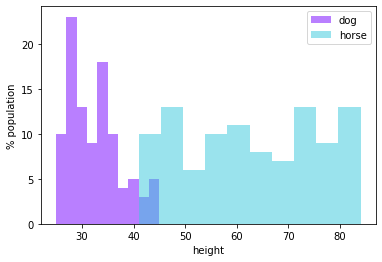

In [2]:
# histagram dog heights in purple 
plt.hist(df.loc[ df['target']==0 ]['height'].to_pandas(), label='dog', color='#7400ff', alpha=0.5)

# histagram horse heights in teal
plt.hist(df[ df['target']==1 ]['height'].to_pandas(), label='horse', color='#36c9dd', alpha=0.5)

# add plot details
plt.xlabel('height'), plt.ylabel('% population')
plt.legend()

#### Weight Scatter Plot
And now let's do something similar for weight. Since the distributions looked pretty uneven, let's focus in on their overlap when it comes to weight. We can do this by scattering the weights on the x-axis with a common y value of 0.

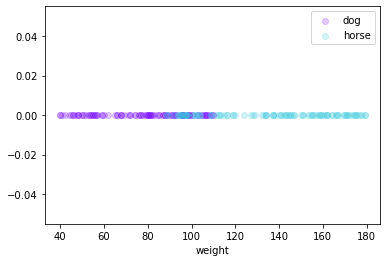

In [3]:
import numpy as np

# scatter dog weights
plt.scatter(df.loc[ df['target']==0 ]['weight'].to_pandas(), 
            y=np.zeros(df.loc[ df['target']==0 ]['weight'].shape), 
            label='dog', 
            color='#7400ff',
            alpha=0.2)

# scatter horse weights
plt.scatter(df[ df['target']==1 ]['weight'].to_pandas(), 
            y=np.zeros(df.loc[ df['target']==1 ]['weight'].shape), 
            label='horse', 
            color='#36c9dd',
            alpha=0.2)

# add plot details
plt.xlabel('weight')
plt.legend()

## Logistic Regression with cuML

In [1]:
from cuml.linear_model.logistic_regression import LogisticRegression

lr = LogisticRegression()

`.fit()` the model to train it.

In [ ]:
lr.fit(X_train, y_train)

Make predictions.

In [ ]:
preds = lr.predict(X_test)

preds.tail()

# Continued Learning
Here are some resources to help fill in any gaps and provide a more complete understanding of Logistic Regression.

### **Reading**

#### CSC 411: Lecture 04: Logistic Regression
- University of Toronto: [04_prob_classif_handout.pdf](https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/04_prob_classif_handout.pdf)
- by Richard Zemel, Raquel Urtasun and Sanja Fidler

#### Logistic Regression 
- Wikipedia: [wikipedia.org/wiki/Logistic_regression](https://wikipedia.org/wiki/Logistic_regression)

### **Videos**

#### StatQuest: Logistic Regression
- Watch on YouTube: https://youtu.be/yIYKR4sgzI8
- Channel: StatQuest with Josh Starmer ([Subscribe](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw?sub_confirmation=1))

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8', width=(1280*0.667), height=(720*0.667))

#### Lecture 6.1 — Logistic Regression | Classification — — [ Machine Learning | Andrew Ng]
- Watch on YouTube: https://youtu.be/-la3q9d7AKQ
- Channel:  Artificial Intelligence - All in One ([Subscribe](https://www.youtube.com/channel/UC5zx8Owijmv-bbhAK6Z9apg?sub_confirmation=1))

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('-la3q9d7AKQ', width=(854), height=(480))